In [40]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)
import pandas as pd
data=pd.read_csv('D:\\_NILESH\\dissertation\\data\\cleaned\\solar_wind.csv')
data

,Unnamed: 0,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,0,2000-01-01 00:00:00,6.82,0.20,664.7,3.12,329179.0,2.76,-0.72
1,1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72
2,2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26
...,...,...,...,...,...,...,...,...,...
5613347,5613347,2023-06-27 00:46:00,5.46,0.01,497.9,1.84,109793.0,0.91,1.03
5613348,5613348,2023-06-27 00:47:00,5.45,0.00,497.9,1.84,109793.0,0.91,1.03
5613349,5613349,2023-06-27 00:48:00,5.49,0.00,497.9,1.84,109793.0,0.91,1.03
5613350,5613350,2023-06-27 00:49:00,5.44,0.00,497.9,1.84,109793.0,0.91,1.03


In [41]:
data.head()

,Unnamed: 0,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,0,2000-01-01 00:00:00,6.82,0.20,664.7,3.12,329179.0,2.76,-0.72
1,1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72
2,2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26


AttributeError: 'numpy.ndarray' object has no attribute 'hist'

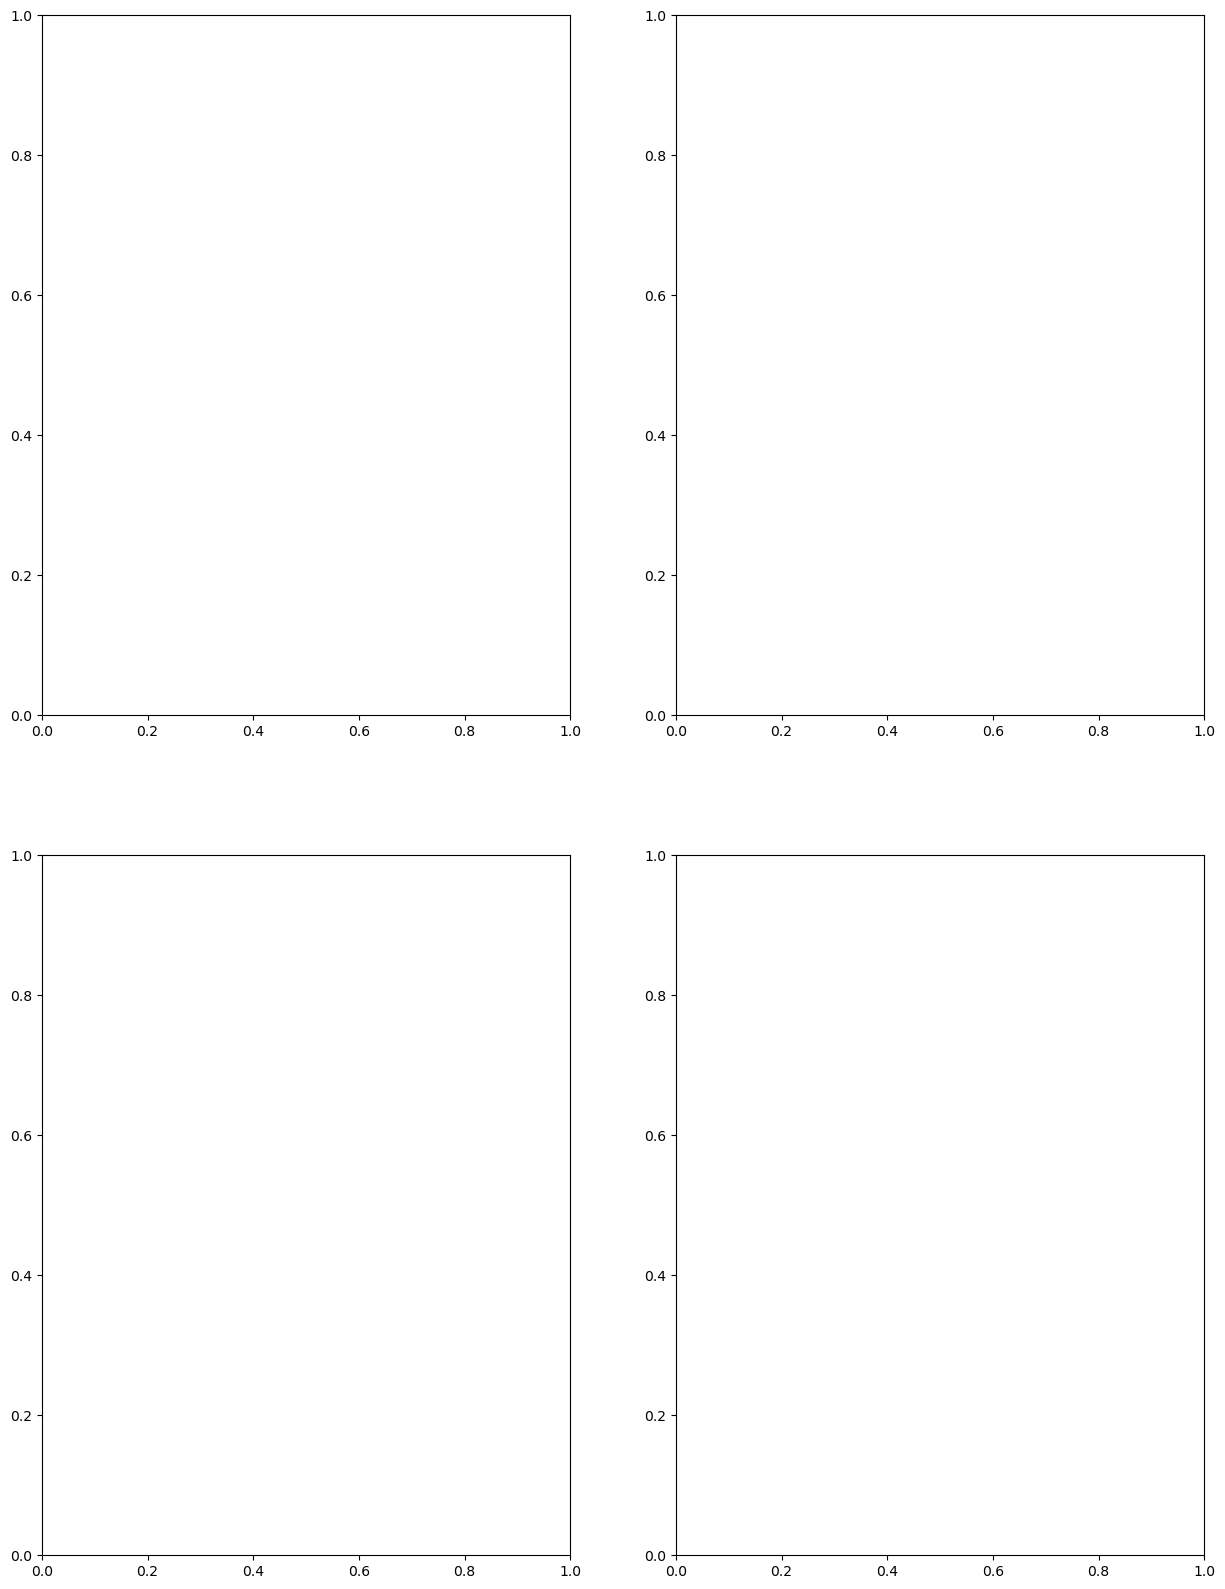

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = data

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0'])
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])

# Resample the data to a monthly frequency using the mean of each month
df_monthly = df_cleaned.resample('M', on='Datetime').mean()

# Plotting distributions for the resampled data
columns_to_plot = ['Field magnitude average, nT', 'Speed, km/s', 'Proton Density, n/cc', 'Proton Temperature, K']
fig, axs = plt.subplots(2, 2, figsize=(15, 20))

for i, column in enumerate(columns_to_plot):
    axs[i].hist(df_monthly[column], bins=50, edgecolor='black', alpha=0.7)
    axs[i].set_title(f"Distribution of {column} (Monthly Resampled)")
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel('Value')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0'])
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Generating the time series plot for the first few columns using the subset data

# Resample the data to a monthly frequency using the mean of each month
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

for i, column in enumerate(columns_to_plot):
    axs[i].plot(df_monthly.index, df_monthly[column])
    axs[i].set_title(f"Time Series of {column}")
    axs[i].set_ylabel(column)
    axs[i].set_xlabel('Datetime')

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = df_monthly

# Time Series Analysis
fig, axs = plt.subplots(4, 1, figsize=(15, 20))
columns_to_plot = ['Field magnitude average, nT', 'Speed, km/s', 'Proton Density, n/cc', 'Proton Temperature, K']
for i, column in enumerate(columns_to_plot):
    axs[i].plot(df_monthly.index, df_monthly[column])
    axs[i].set_title(f"Time Series of {column}")
    axs[i].set_ylabel(column)
    axs[i].set_xlabel('Datetime')
plt.tight_layout()
plt.savefig('image/time_series_plot_wind.png')

# Correlation Heatmap
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Heatmap")
plt.savefig('image/correlation_heatmap_wind.png')


In [ ]:
# Box plot for the columns of interest to check for outliers

fig, axs = plt.subplots(4, 1, figsize=(15, 20))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df_monthly[column], ax=axs[i])
    axs[i].set_title(f"Box Plot of {column}")
    axs[i].set_xlabel(column)

plt.tight_layout()
boxplot_save_path = "image/boxplots_for_outliers_wind.png"
plt.savefig(boxplot_save_path)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data into df_monthly
df = df_monthly

# Time Series Analysis in 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
columns_to_plot = ['Field magnitude average, nT', 'Speed, km/s', 'Proton Density, n/cc', 'Proton Temperature, K']
for i, ax in enumerate(axs.ravel()):
    ax.plot(df.index, df[columns_to_plot[i]])
    ax.set_title(f"Time Series of {columns_to_plot[i]}")
    ax.set_ylabel(columns_to_plot[i])
    ax.set_xlabel('Datetime')
plt.tight_layout()
plt.savefig('image/time_series_plot_wind.png')

columns_to_plot = ['Speed, km/s', 'Proton Temperature, K']
# Box plots in 2x2 grid
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i, ax in enumerate(axs.ravel()):
    sns.boxplot(x=df[columns_to_plot[i]], ax=ax)
    ax.set_title(f"Box Plot of {columns_to_plot[i]}")
    ax.set_xlabel(columns_to_plot[i])
plt.tight_layout()
plt.savefig('image/boxplots_for_outliers_wind.png')


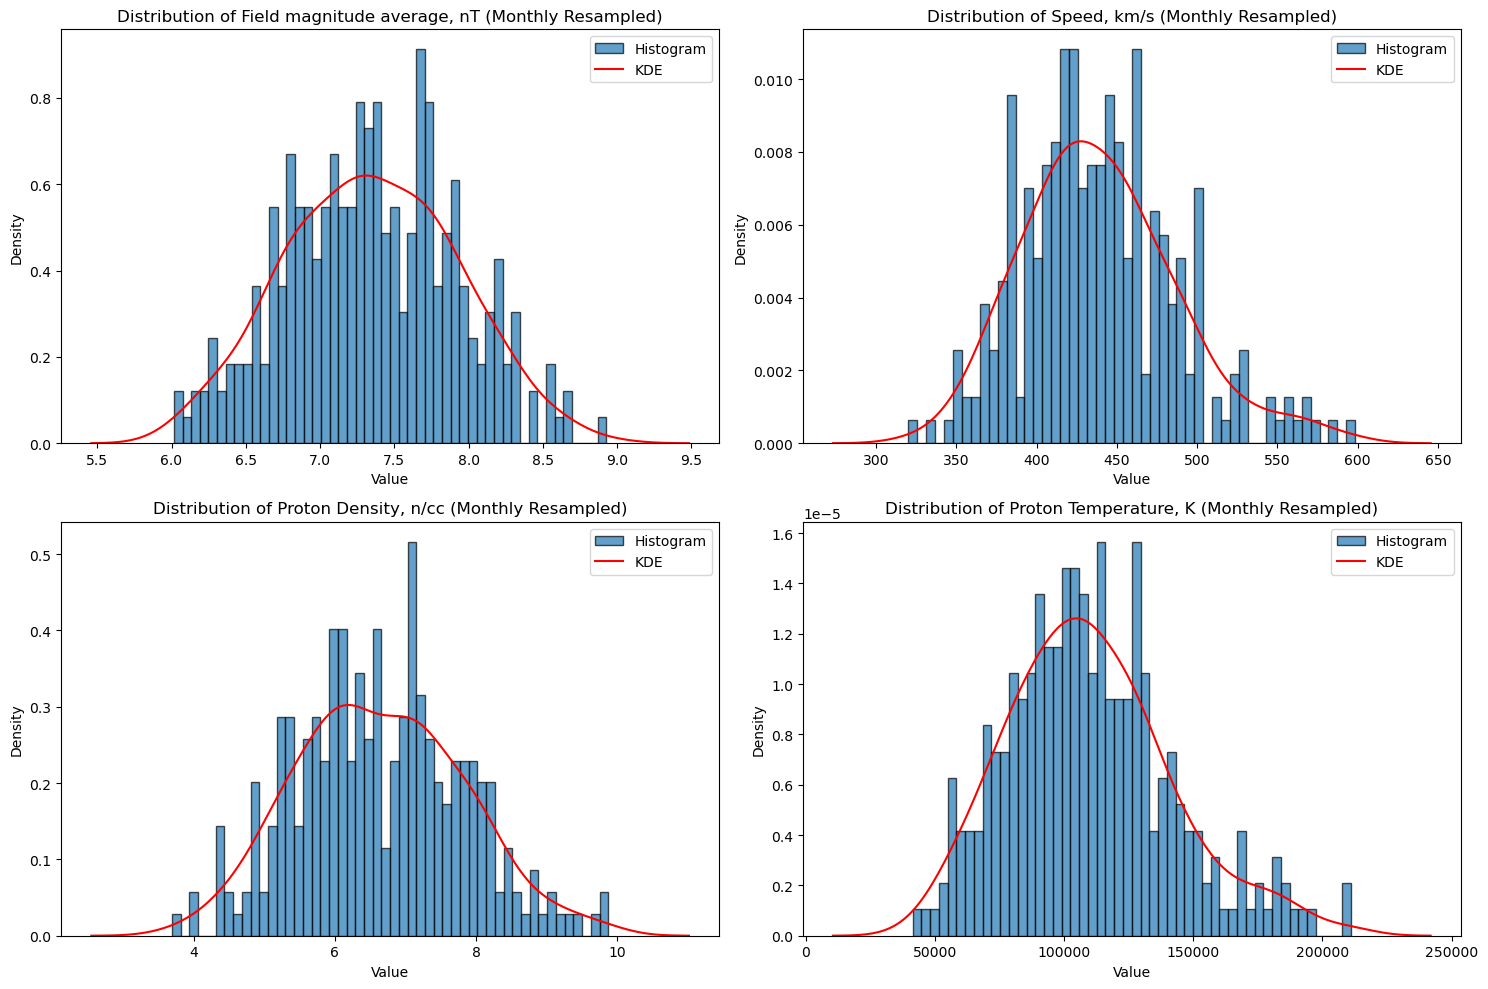

In [48]:
columns_to_plot = ['Field magnitude average, nT', 'Speed, km/s', 'Proton Density, n/cc', 'Proton Temperature, K']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    # Plotting the histogram
    axs[i // 2][i % 2].hist(df_monthly[column], bins=50, edgecolor='black', alpha=0.7, density=True, label='Histogram')
    
    # Plotting the KDE
    sns.kdeplot(df_monthly[column], ax=axs[i // 2][i % 2], color='red', label='KDE')
    
    axs[i // 2][i % 2].set_title(f"Distribution of {column} (Monthly Resampled)")
    axs[i // 2][i % 2].set_ylabel('Density')
    axs[i // 2][i % 2].set_xlabel('Value')
    axs[i // 2][i % 2].legend()

plt.tight_layout()
plt.savefig('image/skewness_bar_wind_with_kde.png')
plt.show()
